# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [72]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

# Predefine options for all plots
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-",})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\bjark\AppData\Local\Temp\ipykernel_22016\4046134352.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# Question 1

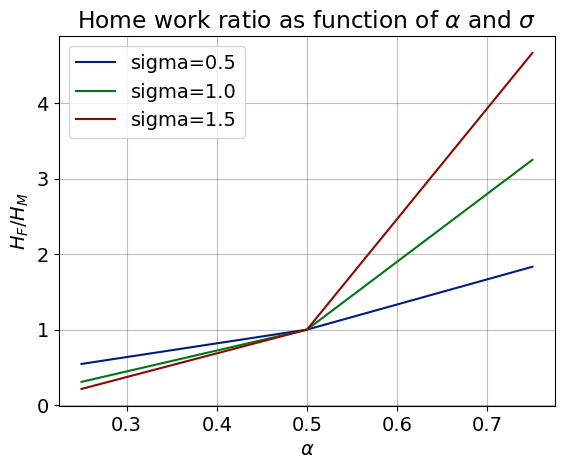

In [74]:
#We construct two vectors of the relevant alphas and sigmas as well as an empty dictionary to store our results
list_alphas = [ 0.25, 0.5, 0.75]
list_sigmas = [ 0.5, 1.0, 1.5]
results_ratio = {}

#We solve the model for each alpha and sigma in the above vectors
for sigma in list_sigmas:
    model.par.sigma = sigma
    for alpha in list_alphas:
        model.par.alpha = alpha 
        opt = model.solve_discrete() #Calling the model from the class
        results_ratio[(alpha, sigma)] = opt.HF/opt.HM #Storing the optimal HF and HM

# Plotting optimal HF and HM
fig = plt.figure()
ax= fig.add_subplot()
for sigma in list_sigmas:
    y = [results_ratio[(alpha, sigma)] for alpha in list_alphas]
    ax.plot(list_alphas, y, label=f"sigma={sigma}")
ax.set_xlabel("$\\alpha$")
ax.set_ylabel("$H_F/H_M$")
ax.set_title('Home work ratio as function of $\\alpha$ and $\sigma$')

ax.legend()
plt.show()

In the above we see that:

If women are more productive than men ($\alpha$>0.5), it is optimal for women to work more in home production compared to men and vice versa. 

If women and men are equally productive in home production it is optimal for them to work equally at home. 

Changes in the realtive productivity between men and women will have a larger effect on the relative participation in home production when men and women are more substitutable in home production i.e. higher $\sigma$.

# Question 2

For Wf = 0.80: LM = 6.00, HM = 4.00, LF = 3.00, HF = 5.00 
For Wf = 0.90: LM = 5.00, HM = 4.50, LF = 4.00, HF = 4.50 
For Wf = 1.00: LM = 4.50, HM = 4.50, LF = 4.50, HF = 4.50 
For Wf = 1.10: LM = 4.00, HM = 4.50, LF = 5.00, HF = 4.00 
For Wf = 1.20: LM = 3.00, HM = 5.00, LF = 5.50, HF = 4.00 


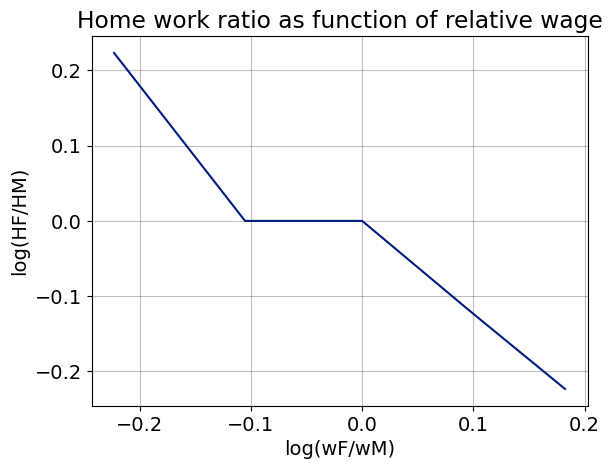

In [264]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM

#We construct two empty vectors to store our results for the work ratio and wage ratio
results_workratio = np.empty(5)
results_wageratio = np.empty(5)

#We solve the model for the discrete series of wage ratios
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve_discrete()
    results_workratio[i] = np.log(opt.HF/opt.HM) #Storing the work ratio
    results_wageratio[i] = np.log(model.par.wF/model.par.wM) #Storing the wage ratio
    print(f'For Wf = {model.par.wF:.2f}: LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f} ') #Printing optimal values

#We plot the work ratio against the wage ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_wageratio, results_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');

The above figures shows that optimal relative partipation of women in home production decreases with a higher relative labor wage for women.

# Question 3

We start out by creating the continious solver (see HouseholdSpecializationModel.py line 77 onwards)

 For Wf = 0.80: LM = 5.92, HM = 4.05, LF = 2.93, HF = 5.08, utility = -0.24511 
 For Wf = 0.90: LM = 4.56, HM = 4.49, LF = 4.41, HF = 4.49, utility = -0.24215 
 For Wf = 1.00: LM = 4.45, HM = 4.45, LF = 4.45, HF = 4.45, utility = -0.23811 
 For Wf = 1.10: LM = 4.35, HM = 4.42, LF = 4.48, HF = 4.41, utility = -0.23422 
 For Wf = 1.20: LM = 3.29, HM = 4.53, LF = 5.39, HF = 4.21, utility = -0.22984 


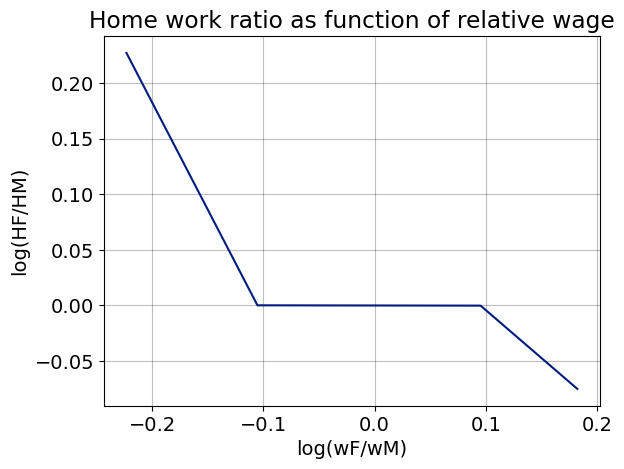

In [155]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM = 1

#We construct two empty vectors to store our results for the work ratio and wage ratio
results_con_workratio = np.empty(5)
results_con_wageratio = np.empty(5)

#We solve the model for the discrete series of wage ratios
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    opt = model.solve()
    results_con_workratio[i] = np.log(opt.HF/opt.HM)
    results_con_wageratio[i] = np.log(model.par.wF/model.par.wM)
    print(f' For Wf = {model.par.wF:.2f}: LM = {opt.LM:.2f}, HM = {opt.HM:.2f}, LF = {opt.LF:.2f}, HF = {opt.HF:.2f}, utility = {opt.util:.5f} ') #Printing optimal values

#We plot the work ratio against the wage ratio
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(results_con_wageratio, results_con_workratio)
ax.set_title('Home work ratio as function of relative wage')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)');




The above figures shows that optimal relative partipation of women in home production decreases with a higher relative labor wage for women.

# Question 4

We start out by creating the solver for the vector of female wages (see HouseholdSpecilizationModel.py line 130 and onwards)

 beta0 = 0.19, beta1 = -0.04, deviation = 0.05, alpha = 0.98, sigma = 0.05


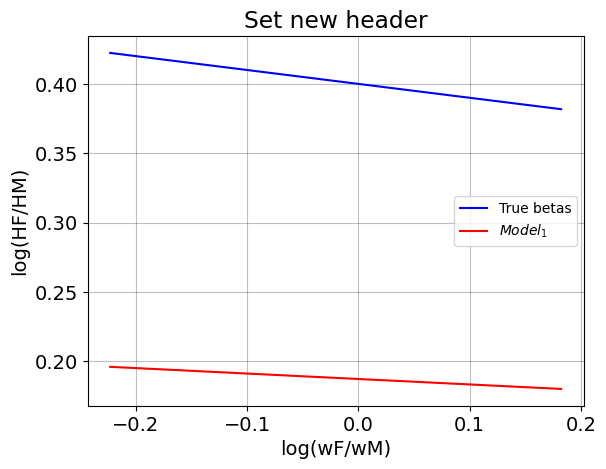

In [265]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM = 1

#First we run the solver for the vector of female wages to find optimal choices
model.solve_wF_vec()
#We use the above optimal choices to estimate the betas using OLS
model.estimate()
beta0_hat = model.sol.beta0
beta1_hat = model.sol.beta1
print(f' beta0 = {model.sol.beta0:.2f}, beta1 = {model.sol.beta1:.2f}, deviation = {((0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2):.2f}, alpha = {model.par.alpha:.2f}, sigma = {model.par.sigma:.2f}')

#We create two empty vectors to store results of the model prediction using the 'true' estimators and the estimators from the model
pointestimates_data = np.empty(5)
pointestimates_model = np.empty(5)


#For each female wage in the vector, we compute model predictions  of home work ratio for the 'true' estimators and the estimators from the model
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    pointestimates_model[i] = beta0_hat + beta1_hat*np.log(wF/model.par.wM)
    pointestimates_data[i] = 0.4 - 0.1*np.log(wF/model.par.wM)

#We plot the estimates of work ratio as function of wage ratio based on 'true' estimators and estimators from the model
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec), pointestimates_data, label = 'True betas', color = 'b')
ax.plot(np.log(model.par.wF_vec), pointestimates_model, label = '$Model_1$', color = 'r')
ax.set_title('Set new header')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')
ax.legend(loc=5, prop={'size': 10}) ;
    

# Question 5

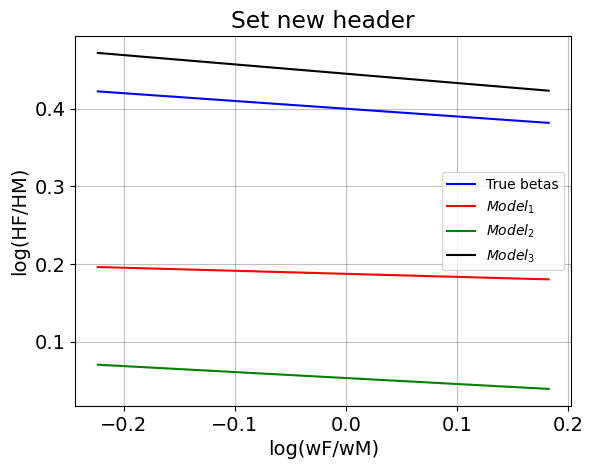

In [262]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.wM = 1 

#We make a new estimator (see py file line 169 onwards) that minimizes squarred deviations from true betas holding alpha fixed and varying sigma
model.estimatev2()
#We store the betas from the above estimation
beta0_hat2 = model.sol.beta0
beta1_hat2 = model.sol.beta1

#We extend the model by setting male wages equal to two. Then we minimize squarred deviation from true betas again as above.
model.par.wM = 2
model.estimatev2()
#We store the betas from the above estimation
beta0_hat3 = model.sol.beta0
beta1_hat3 = model.sol.beta1

#We create two empty vectors to store results of the model prediction of home work ratio with fixed alpha for male wage equal to 1 and 2 respectively.
pointestimates_model2 = np.empty(5)
pointestimates_model3 = np.empty(5)

#For each female wage in the vector, we compute model predictions of home work ratio for the two above models
for i, wF in enumerate(model.par.wF_vec):
    model.par.wF = wF
    pointestimates_model2[i] = beta0_hat2 + beta1_hat2*np.log(wF/model.par.wM)
    pointestimates_model3[i] = beta0_hat3 + beta1_hat3*np.log(wF/model.par.wM)


#We plot the work ratio against the wage ratio for the data and our three models
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec), pointestimates_data, label = 'True betas', color = 'b')
ax.plot(np.log(model.par.wF_vec), pointestimates_model, label = '$Model_1$', color = 'r')
ax.plot(np.log(model.par.wF_vec), pointestimates_model2, label = '$Model_2$', color= 'g' )
ax.plot(np.log(model.par.wF_vec), pointestimates_model3, label = '$Model_3$', color = 'k')
ax.set_title('Set new header')
ax.set_xlabel('log(wF/wM)')
ax.set_ylabel('log(HF/HM)')
ax.legend(loc=5, prop={'size': 10}) ;


# TEST

In [159]:
#We set parameters to baseline
model.par.alpha = 0.5
model.par.sigma = 1
model.par.wM = 2 


model.estimate()
print(f' beta0 = {model.sol.beta0}, beta1 = {model.sol.beta1}, deviation = {(0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2}, alpha = {model.par.alpha}, sigma = {model.par.sigma}')

 beta0 = 0.3618890318262431, beta1 = -0.1200333961720737, deviation = 0.00185378285732837, alpha = 0.5, sigma = 0.5957329026838213


In [240]:
model.par.alpha = 0.5
model.estimatev3()

print(f'beta0 = {model.sol.beta0}, beta1 = {model.sol.beta1},deviation = {(0.4-model.sol.beta0)**2+(-0.1- model.sol.beta1)**2}, Wm = {model.par.wM}, sigma = {model.par.sigma} ')

beta0 = 0.811577683235925, beta1 = -0.019124941418091408,deviation = 0.1759369644384786, Wm = 3.9984075336514917, sigma = 2.019682405730991 
